# MIMIC-II IAC Introduction

This tutorial explores the MIMIC-II IAC dataset. It was created for the purpose of a case study in the book: Secondary Analysis of Electronic Health Records, published by Springer in 2016. In particular, the dataset was used throughout Chapter 16 (Data Analysis) by Raffa J. et al. to investigate the effectiveness of indwelling arterial catheters in hemodynamically stable patients with respiratory failure for mortality outcomes. The dataset is derived from MIMIC-II, the publicly-accessible critical care database. It contains summary clinical data and  outcomes for 1,776 patients.

More details on the dataset can be found here: https://physionet.org/content/mimic2-iaccd/1.0/.

## Importing ehrapy and setting plotting parameters

In [1]:
import ehrapy as ep
import seaborn as sns
import matplotlib.pyplot as plt

Installed version 0.3.0 of ehrapy is newer than the latest release 0.2.0! You are running a nightly version and 
features may break!

/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/medcat/cat.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

In [3]:
ep.print_versions()

-----
ehrapy              0.3.0
rich                NA
scanpy              1.9.1
session_info        1.0.0
-----
PIL                 9.2.0
PyPDF2              2.6.0
anndata             0.8.0
anyio               NA
astor               0.8.1
asttokens           NA
attr                21.4.0
autograd            NA
autograd_gamma      NA
babel               2.10.3
backcall            0.2.0
backports           NA
blis                NA
bs4                 4.11.1
camelot             0.10.1
catalogue           NA
category_encoders   2.5.0
certifi             2022.06.15
cffi                1.15.1
chardet             5.0.0
charset_normalizer  2.1.0
click               8.0.4
cloudpickle         2.0.0
colorama            0.4.5
cryptography        37.0.4
cv2                 4.6.0
cvxopt              1.3.0
cycler              0.10.0
cymem               NA
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.0
decorator           5.1.1
deep_translator     1.8.0
deepl               1.9.0
defusedxml          0.7.1
dill                0.3.4
entrypoints         0.4
executing           0.8.3
fastjsonschema      NA
formulaic           0.3.4
future              0.18.2
h5py                3.7.0
html5lib            1.1
idna                3.3
igraph              0.9.11
importlib_resources NA
interface_meta      1.3.0
ipykernel           6.10.0
ipython_genutils    0.2.0
ipywidgets          7.6.5
jedi                0.18.1
jinja2              3.1.2
joblib              1.1.0
json5               NA
jsonschema          4.7.2
jupyter_server      1.11.2
jupyterlab_server   2.8.2
kiwisolver          1.4.4
leidenalg           0.8.10
lifelines           0.27.1
llvmlite            0.34.0
markupsafe          2.1.1
matplotlib          3.5.2
medcat              NA
mpl_toolkits        NA
mudata              0.2.0
multiprocess        0.70.12.2
murmurhash          NA
natsort             8.1.0
nbclassic           NA
nbformat            5.4.0
numba               0.51.2
numpy               1.23.1
packaging           21.3
pandas              1.4.2
parso               0.8.3
patsy               0.5.2
pdfminer            20220524
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
preshed             NA
prometheus_client   NA
prompt_toolkit      3.0.30
psutil              5.9.0
ptyprocess          0.7.0
pure_eval           0.2.2
pvectorc            NA
pyarrow             7.0.0
pydantic            NA
pydev_ipython       NA
pydevconsole        NA
pydevd              2.8.0
pydevd_file_utils   NA
pydevd_plugins      NA
pydevd_tracing      NA
pygments            2.12.0
pyhpo               3.1.2
pyparsing           3.0.9
pypi_latest         0.1.2
pyrsistent          NA
pytz                2022.1
questionary         1.10.0
requests            2.28.1
ruamel              NA
scipy               1.6.1
seaborn             0.11.2
send2trash          NA
setuptools          61.2.0
setuptools_scm      NA
shellingham         1.4.0
six                 1.16.0
sklearn             1.1.1
sniffio             1.2.0
soupsieve           2.3.2.post1
spacy               3.1.3
sphinxcontrib       NA
srsly               2.4.2
stack_data          0.3.0
statsmodels         0.13.2
terminado           0.13.3
texttable           1.6.4
thinc               8.0.15
threadpoolctl       3.1.0
tokenizers          0.10.3
torch               1.9.1+cu102
tornado             6.2
tqdm                4.64.0
traitlets           5.3.0
typer               0.4.0
typing_extensions   NA
urllib3             1.26.10
wasabi              0.9.0
wcwidth             0.2.5
webencodings        0.5.1
websocket           1.2.1
wrapt               1.14.1
yaml                6.0
zipp                NA
zmq                 23.2.0
-----
IPython             8.4.0
jupyter_client      7.3.4
jupyter_core        4.11.1
jupyterlab          3.2.1
notebook            6.4.10
-----
Python 3.8.13 (default, Mar 28 2022, 11:38:47) [GCC 7.5.0]
Linux-5.18.14-arch1-1-x86_64-with-glibc2.17
-----
Session information 

In [4]:
ep.settings.set_figure_params(figsize=(4, 4))

## MIMIC-II dataset preparation

In [5]:
adata = ep.dt.mimic_2(encoded=False)

It is also possible to get the MIMIC-II dataset already pre-encoded by setting the encoded flag to 'True'. ehrapy's default encoding is a simple label encoding in this case.

In [6]:
adata

AnnData object with n_obs × n_vars = 1776 × 46
    uns: 'numerical_columns', 'non_numerical_columns'
    layers: 'original'

The MIMIC-II dataset has 1776 patients as described above with 46 features.

The **service_unit** and **day_icu_intime** variables are categorical. We will therefore encode them first with one-hot encoding. This ensures that no ordering is preserved.

In [7]:
adata = ep.pp.encode(
    adata, encodings={"one_hot_encoding": ["service_unit", "day_icu_intime"]}
)

Output()

In [8]:
adata

AnnData object with n_obs × n_vars = 1776 × 54
    obs: 'service_unit', 'day_icu_intime'
    uns: 'numerical_columns', 'non_numerical_columns', 'encoding_to_var', 'original_values_categoricals', 'var_to_encoding'
    layers: 'original'

After one-hot encoding the two columns we've expanded our matrix from 46 to 54 features.
Let's verify that we've indeed encoded all columns and are ready to proceed.

In [9]:
ep.ad.type_overview(adata)

Variable names for AnnData object with 1776 obs and 54 vars
╠══ 🔐 Encoded variables
║   ╠══ service_unit -> 3 categories; one hot encoded; original data type: string
║   ╚══ day_icu_intime -> 7 categories; one hot encoded; original data type: string
╚══ 🔓 Unencoded variables
    ╠══ aline_flg -> data type: floating
    ╠══ icu_los_day -> data type: floating
    ╠══ hospital_los_day -> data type: floating
    ╠══ age -> data type: floating
    ╠══ gender_num -> data type: floating
    ╠══ weight_first -> data type: floating
    ╠══ bmi -> data type: floating
    ╠══ sapsi_first -> data type: floating
    ╠══ sofa_first -> data type: floating
    ╠══ service_num -> data type: floating
    ╠══ day_icu_intime_num -> data type: floating
    ╠══ hour_icu_intime -> data type: floating
    ╠══ hosp_exp_flg -> data type: floating
    ╠══ icu_exp_flg -> data type: floating
    ╠══ day_28_flg -> data type: floating
    ╠══ mort_day_censored -> data type: floating
    ╠══ censor_flg -> data type: floating
    ╠══ sepsis_flg -> data type: floating
    ╠══ chf_flg -> data type: floating
    ╠══ afib_flg -> data type: floating
    ╠══ renal_flg -> data type: floating
    ╠══ liver_flg -> data type: floating
    ╠══ copd_flg -> data type: floating
    ╠══ cad_flg -> data type: floating
    ╠══ stroke_flg -> data type: floating
    ╠══ mal_flg -> data type: floating
    ╠══ resp_flg -> data type: floating
    ╠══ map_1st -> data type: floating
    ╠══ hr_1st -> data type: floating
    ╠══ temp_1st -> data type: floating
    ╠══ spo2_1st -> data type: floating
    ╠══ abg_count -> data type: floating
    ╠══ wbc_first -> data type: floating
    ╠══ hgb_first -> data type: floating
    ╠══ platelet_first -> data type: floating
    ╠══ sodium_first -> data type: floating
    ╠══ potassium_first -> data type: floating
    ╠══ tco2_first -> data type: floating
    ╠══ chloride_first -> data type: floating
    ╠══ bun_first -> data type: floating
    ╠══ creatinine_first -> data type: floating
    ╠══ po2_first -> data type: floating
    ╠══ pco2_first -> data type: floating
    ╚══ iv_day_1 -> data type: floating

## Preprocessing

### Quality control - missing values

ehrapy's **qc_metrics** function will calculate several useful metrics such as the absolute number and percentages of missing values and properties like the mean/median/min/max of all features.

In [10]:
_ = ep.pp.qc_metrics(adata)
ep.pl.qc_metrics(adata)

                                             Ehrapy qc metrics of var                                              
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Column name ┃ missing_va… ┃ missing_va… ┃        mean ┃       median ┃ standard_d… ┃          min ┃         max ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ ehrapycat_… │         0.0 │         0.0 │ 0.03490991… │          0.0 │ 0.18354931… │          0.0 │         1.0 │
│ ehrapycat_… │         0.0 │         0.0 │ 0.41216215… │          0.0 │ 0.49222636… │          0.0 │         1.0 │
│ ehrapycat_… │         0.0 │         0.0 │ 0.55292791… │          1.0 │ 0.49718642… │          0.0 │         1.0 │
│ ehrapycat_… │         0.0 │         0.0 │ 0.13175675… │          0.0 │ 0.33822712… │          0.0 │         1.0 │
│ ehrapycat_… │         0.0 │         0.0 │ 0.14639639… │          0.0 │ 0.35350620… │          0.0 │         1.0 │
│ ehrapycat_… │         0.0 │         0.0 │ 0.15653152… │          0.0 │ 0.36336147… │          0.0 │         1.0 │
│ ehrapycat_… │         0.0 │         0.0 │ 0.12950450… │          0.0 │ 0.33575624… │          0.0 │         1.0 │
│ ehrapycat_… │         0.0 │         0.0 │ 0.14695945… │          0.0 │ 0.35406231… │          0.0 │         1.0 │
│ ehrapycat_… │         0.0 │         0.0 │ 0.14470720… │          0.0 │ 0.35180327… │          0.0 │         1.0 │
│ ehrapycat_… │         0.0 │         0.0 │ 0.14414414… │          0.0 │ 0.35123682… │          0.0 │         1.0 │
│   aline_flg │         0.0 │         0.0 │ 0.55405408… │          1.0 │ 0.49706628… │          0.0 │         1.0 │
│ icu_los_day │         0.0 │         0.0 │ 3.34649777… │ 2.184999942… │ 3.35531425… │          0.5 │ 28.2399997… │
│ hospital_l… │         0.0 │         0.0 │ 8.11092376… │          6.0 │ 8.15486621… │          1.0 │       112.0 │
│         age │         0.0 │         0.0 │ 54.3795852… │ 53.67858505… │ 21.0569190… │ 15.18023014… │ 99.1109466… │
│  gender_num │         1.0 │ 0.05630630… │ 0.57746475… │          1.0 │ 0.49396190… │          0.0 │         1.0 │
│ weight_fir… │       110.0 │ 6.19369369… │ 80.0759735… │         77.0 │ 22.4837551… │         30.0 │ 257.600006… │
│         bmi │       466.0 │ 26.2387387… │ 27.8273296… │ 26.32484626… │ 8.20693683… │ 12.78487682… │ 98.7971343… │
│ sapsi_first │        85.0 │ 4.78603603… │ 14.1366052… │         14.0 │ 4.11308765… │          3.0 │        32.0 │
│  sofa_first │         6.0 │ 0.33783783… │ 5.82090377… │          6.0 │ 2.33400630… │          0.0 │        17.0 │
│ service_num │         0.0 │         0.0 │ 0.55292791… │          1.0 │ 0.49718642… │          0.0 │         1.0 │
│ day_icu_in… │         0.0 │         0.0 │ 4.05405426… │          4.0 │ 1.99391329… │          1.0 │         7.0 │
│ hour_icu_i… │         0.0 │         0.0 │ 10.5855855… │          9.0 │ 7.92273378… │          0.0 │        23.0 │
│ hosp_exp_f… │         0.0 │         0.0 │ 0.13738738… │          0.0 │ 0.34425526… │          0.0 │         1.0 │
│ icu_exp_flg │         0.0 │         0.0 │ 0.09572072… │          0.0 │ 0.29420605… │          0.0 │         1.0 │
│  day_28_flg │         0.0 │         0.0 │ 0.15934684… │          0.0 │ 0.36599808… │          0.0 │         1.0 │
│ mort_day_c… │         0.0 │         0.0 │ 614.329528… │        731.0 │ 402.995513… │          0.0 │ 3094.08007… │
│  censor_flg │         0.0 │         0.0 │ 0.72015768… │          1.0 │ 0.44891849… │          0.0 │         1.0 │
│  sepsis_flg │         0.0 │         0.0 │         0.0 │          0.0 │         0.0 │          0.0 │         0.0 │
│     chf_flg │         0.0 │         0.0 │ 0.11993243… │          0.0 │ 0.32488462… │          0.0 │         1.0 │
│    afib_flg │         0.0 │         0.0 │ 0.11655405… │          0.0 │ 0.32088759… │          0.0 │         1.0 │
│   renal_flg │         0.0 │         0.0 │ 0.03378378… 

In [11]:
adata.obs

service_unit day_icu_intime  missing_values_abs  missing_values_pct
0            SICU      Friday                      0            0.000000
1            MICU      Saturday                   12           22.222222
2            MICU      Friday                      0            0.000000
3            SICU      Saturday                    3            5.555556
4            SICU      Saturday                    0            0.000000
...           ...            ...                 ...                 ...
1771         MICU      Sunday                      1            1.851852
1772         SICU      Saturday                    1            1.851852
1773         MICU      Tuesday                     3            5.555556
1774         SICU      Wednesday                   1            1.851852
1775         MICU      Monday                      1            1.851852

[1776 rows x 4 columns]

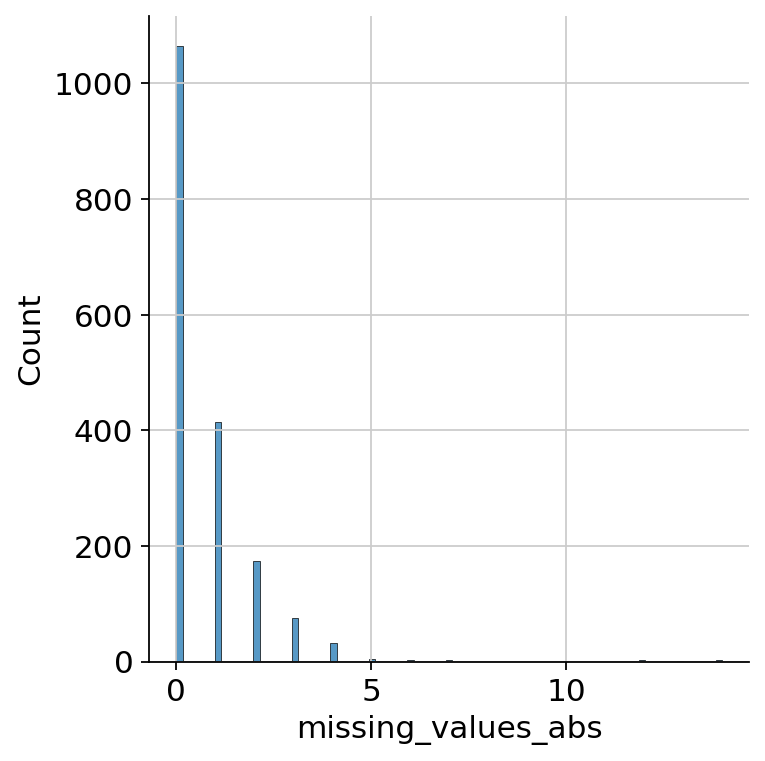

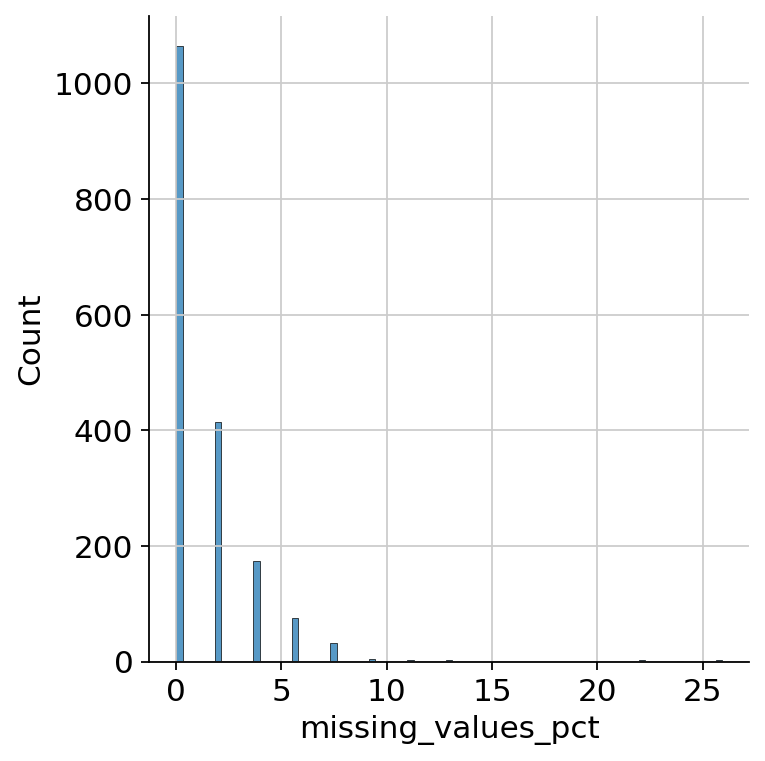

In [12]:
_ = sns.displot(adata.obs["missing_values_abs"])
plt.show()

_ = sns.displot(adata.obs["missing_values_pct"])

In [13]:
adata.var

missing_values_abs  missing_values_pct  \
ehrapycat_service_unit_FICU                          0            0.000000   
ehrapycat_service_unit_MICU                          0            0.000000   
ehrapycat_service_unit_SICU                          0            0.000000   
ehrapycat_day_icu_intime_Friday                      0            0.000000   
ehrapycat_day_icu_intime_Monday                      0            0.000000   
ehrapycat_day_icu_intime_Saturday                    0            0.000000   
ehrapycat_day_icu_intime_Sunday                      0            0.000000   
ehrapycat_day_icu_intime_Thursday                    0            0.000000   
ehrapycat_day_icu_intime_Tuesday                     0            0.000000   
ehrapycat_day_icu_intime_Wednesday                   0            0.000000   
aline_flg                                            0            0.000000   
icu_los_day                                          0            0.000000   
hospital_los_day                                     0            0.000000   
age                                                  0            0.000000   
gender_num                                           1            0.056306   
weight_first                                       110            6.193694   
bmi                                                466           26.238739   
sapsi_first                                         85            4.786036   
sofa_first                                           6            0.337838   
service_num                                          0            0.000000   
day_icu_intime_num                                   0            0.000000   
hour_icu_intime                                      0            0.000000   
hosp_exp_flg                                         0            0.000000   
icu_exp_flg                                          0            0.000000   
day_28_flg                                           0            0.000000   
mort_day_censored                                    0            0.000000   
censor_flg                                           0            0.000000   
sepsis_flg                                           0            0.000000   
chf_flg                                              0            0.000000   
afib_flg                                             0            0.000000   
renal_flg                                            0            0.000000   
liver_flg                                            0            0.000000   
copd_flg                                             0            0.000000   
cad_flg                                              0            0.000000   
stroke_flg                                           0            0.000000   
mal_flg                                              0            0.000000   
resp_flg                                             0            0.000000   
map_1st                                              0            0.000000   
hr_1st                                               0            0.000000   
temp_1st                                             3            0.168919   
spo2_1st                                             0            0.000000   
abg_count                                            0            0.000000   
wbc_first                                            8            0.450450   
hgb_first                                            8            0.450450   
platelet_first                                       8            0.450450   
sodium_first                                         5            0.281532   
potassium_first                                      5            0.281532   
tco2_first                                           5            0.281532   
chloride_first                                       5            0.281532   
bun_first                                            5            0.281532   
creatinine_first                                     6    

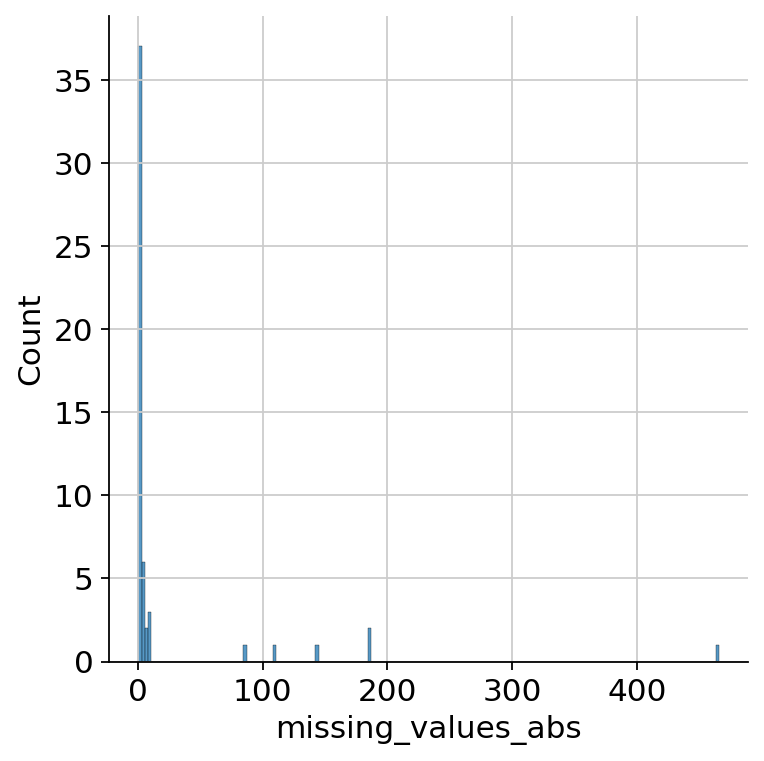

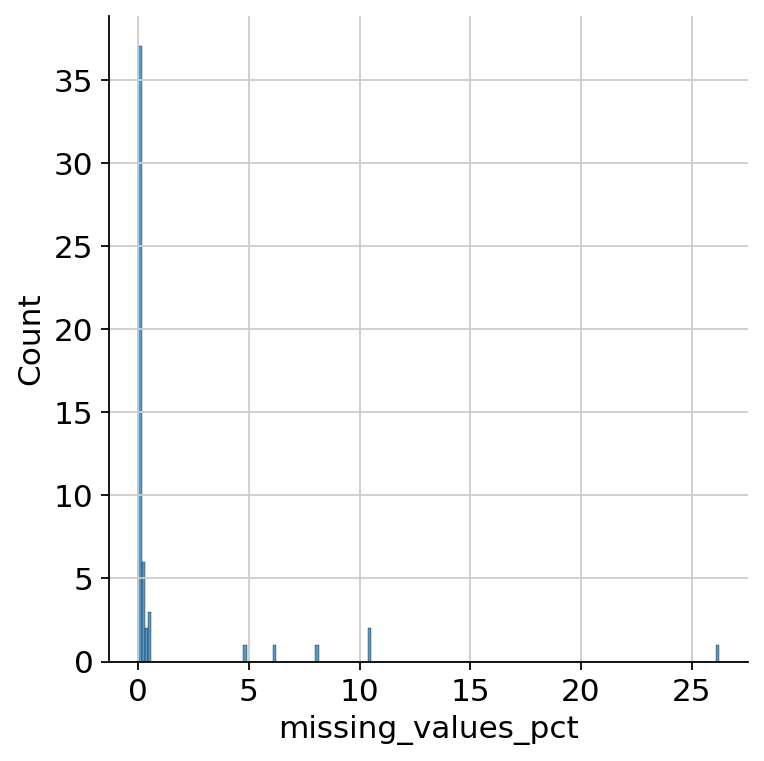

In [14]:
_ = sns.displot(adata.var["missing_values_abs"])
plt.show()

_ = sns.displot(adata.var["missing_values_pct"])

The data still has several features with missing values, but none of them exceed more than 27% (BMI) of percentage of missing values.
Hence, there is no need to drop any of the observations nor features. We can simply impute the missing values.

### Missing Data Imputation

In [15]:
ep.pp.knn_impute(adata)

scikit-learn-intelex is not available. Install via pip install scikit-learn-intelex  for faster imputations.

Output()

We can now confirm that there are indeed no missing values present.

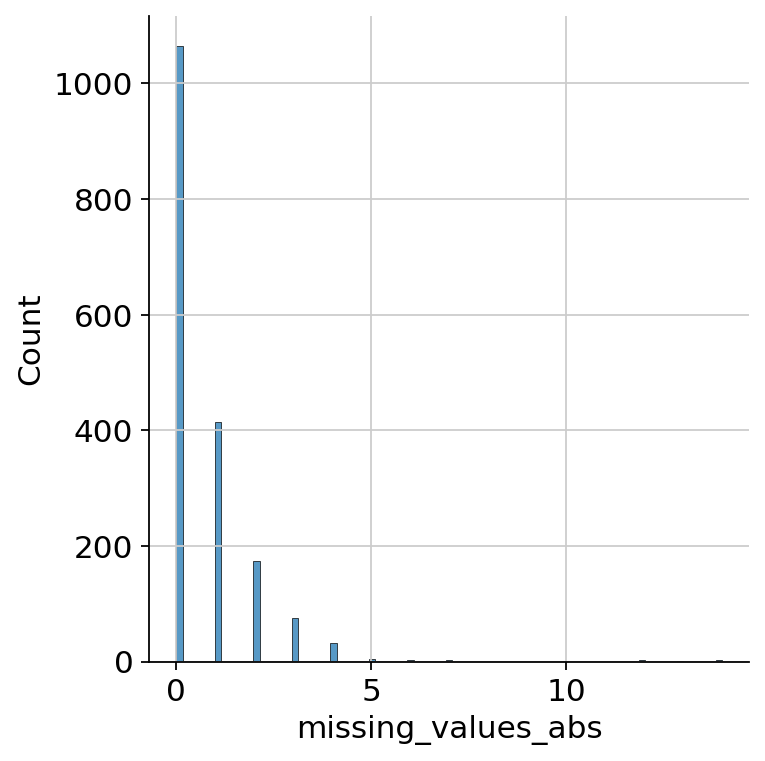

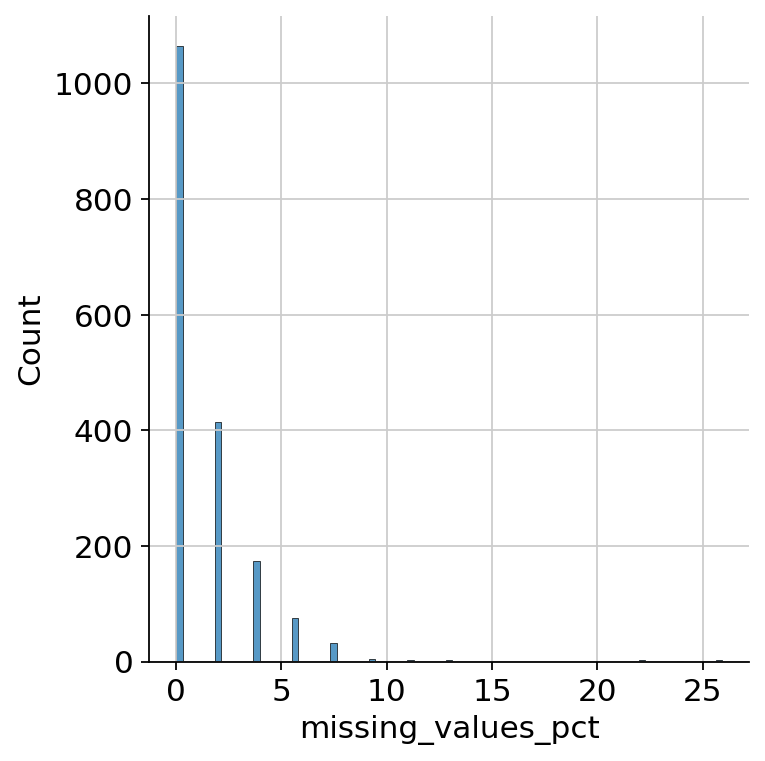

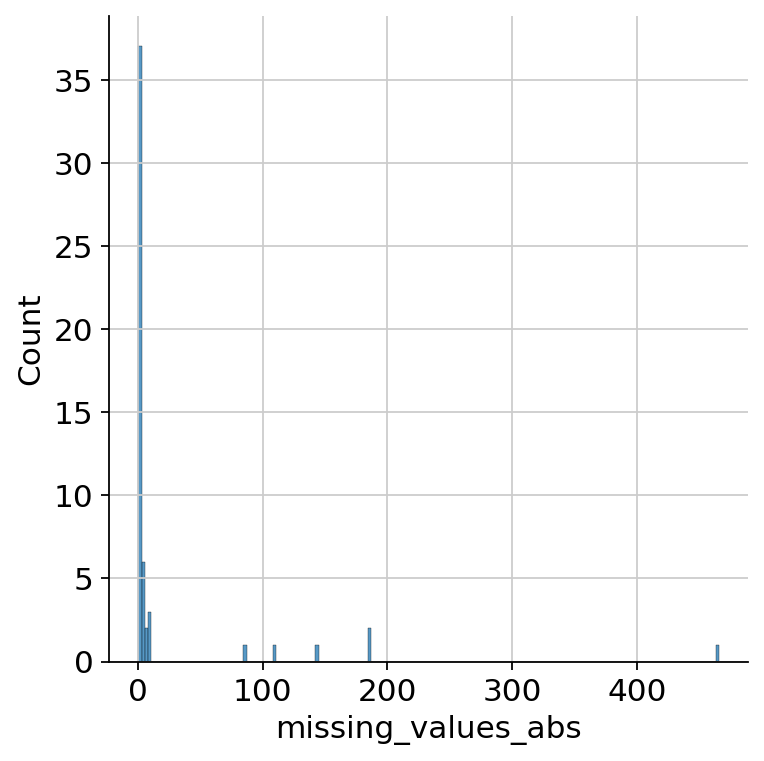

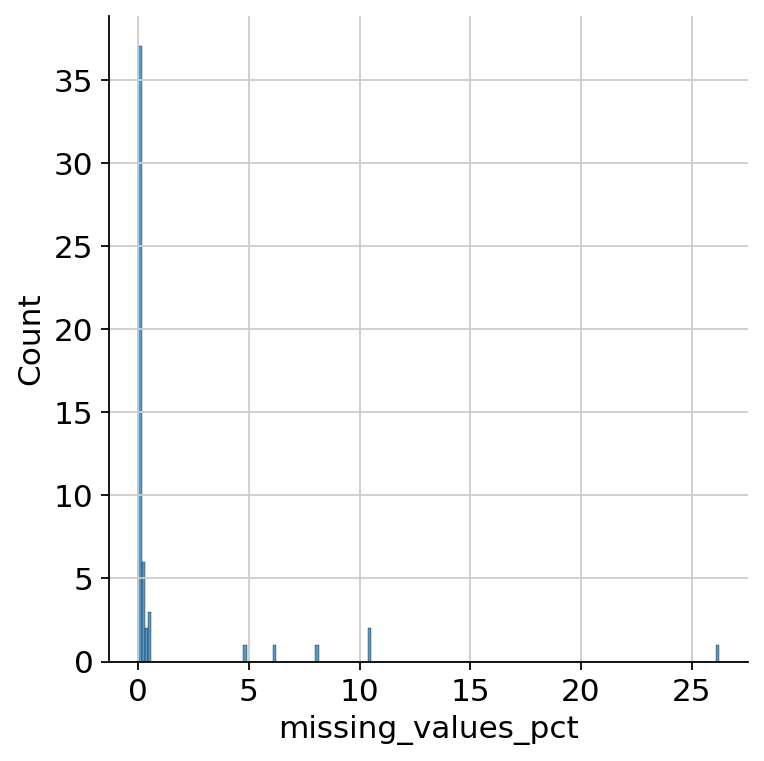

In [16]:
_ = sns.displot(adata.obs["missing_values_abs"])
plt.show()

_ = sns.displot(adata.obs["missing_values_pct"])
plt.show()

_ = sns.displot(adata.var["missing_values_abs"])
plt.show()

_ = sns.displot(adata.var["missing_values_pct"])

### Quality Control - Data Distribution

Depending on the measurement and the unit of a measurement the value ranges of features may be huge.
Clusterings and differential comparisons especially may be greatly influenced by exceptionally big values.

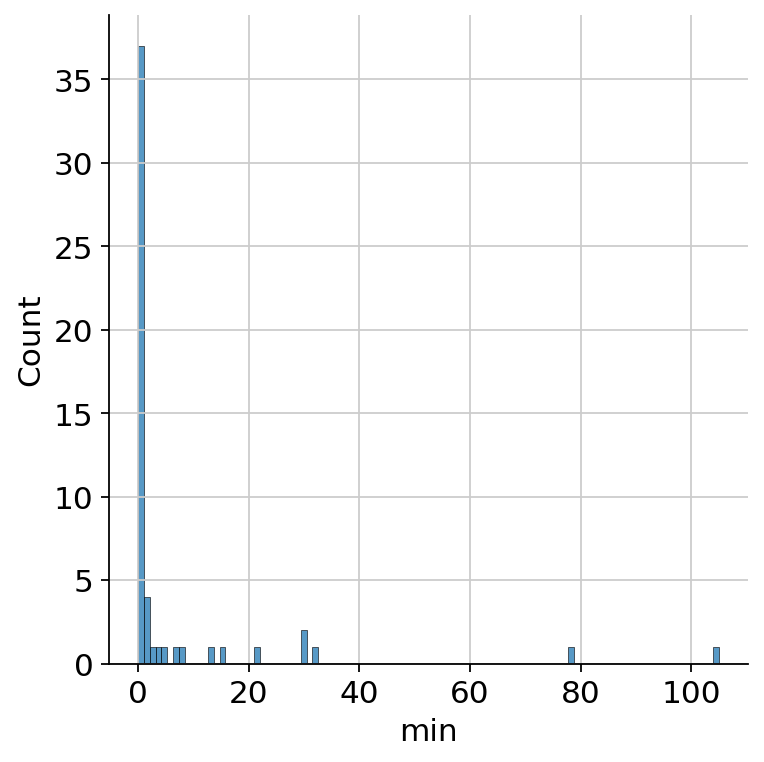

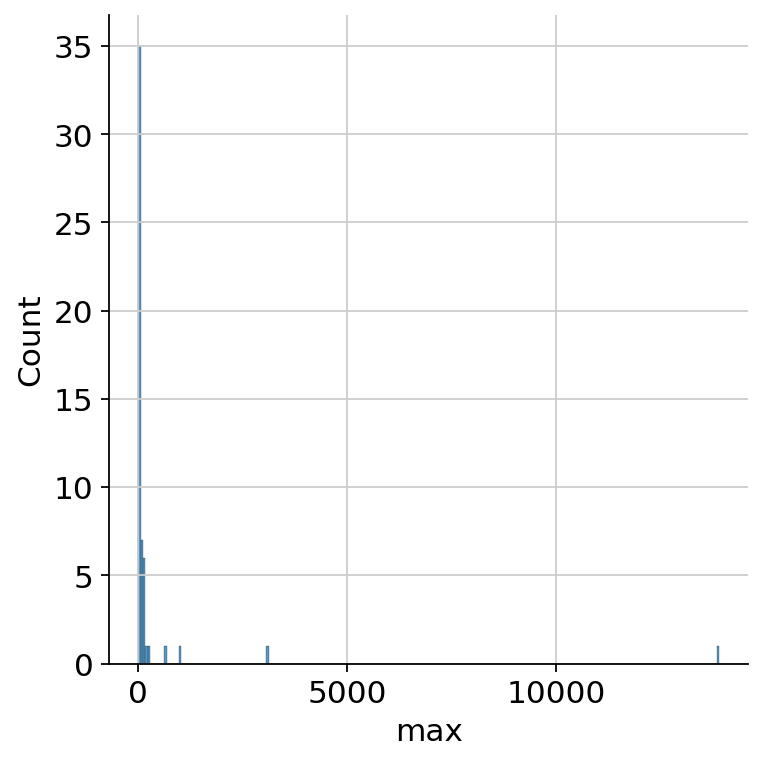

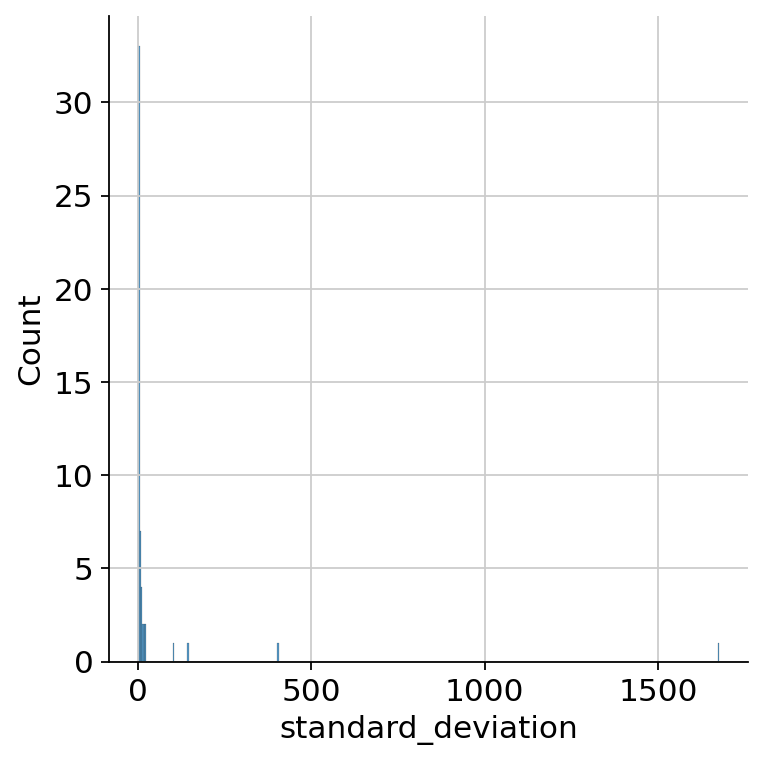

In [17]:
_ = sns.displot(adata.var["min"])
plt.show()

_ = sns.displot(adata.var["max"])
plt.show()

_ = sns.displot(adata.var["standard_deviation"])

In [18]:
adata.var[adata.var["standard_deviation"] > 500]

missing_values_abs  missing_values_pct         mean       median  \
iv_day_1                 143            8.051802  1622.908203  1081.529175   

          standard_deviation  min      max  
iv_day_1          1676.61499  0.0  13910.0

The standard deviation of the feature **iv_day_1** is huge together with a very low miniumum value of 0 and a maximum value of 13910.
This feature requires normalization.

## Normalization

ehrapy offers several options to normalize data. While it is possible to normalize all numerical values at once with the same normalization function we might be able to get away with just normalizing the `iv_day_1` feature.
log normalization with an offset of 1 to add pseudocounts seems appropriate.

In [19]:
ep.pp.log_norm(adata, vars=["iv_day_1"], offset=1)

AnnData object with n_obs × n_vars = 1776 × 54
    obs: 'service_unit', 'day_icu_intime', 'missing_values_abs', 'missing_values_pct'
    var: 'missing_values_abs', 'missing_values_pct', 'mean', 'median', 'standard_deviation', 'min', 'max'
    uns: 'numerical_columns', 'non_numerical_columns', 'encoding_to_var', 'original_values_categoricals', 'var_to_encoding', 'normalization'
    layers: 'original', 'raw_norm'

In [20]:
_ = ep.pp.qc_metrics(adata)
ep.pl.qc_metrics

<function ehrapy.plot._qc.qc_metrics(adata: 'AnnData', extra_columns: 'list[str] | None' = None) -> 'None'>

## Dimensionality reduction

In [21]:
ep.pp.pca(adata)

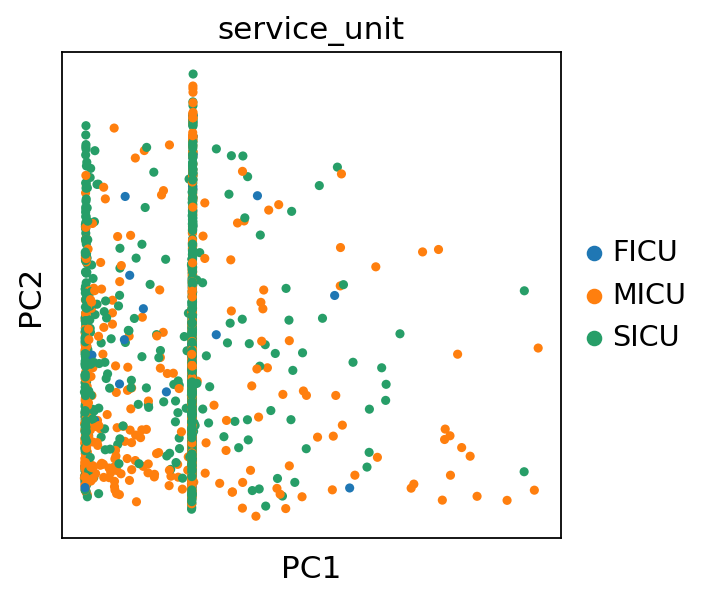

In [22]:
ep.pl.pca(adata, color="service_unit")

In [23]:
ep.pp.neighbors(adata)

In [24]:
ep.tl.umap(adata)

## Batch effect check

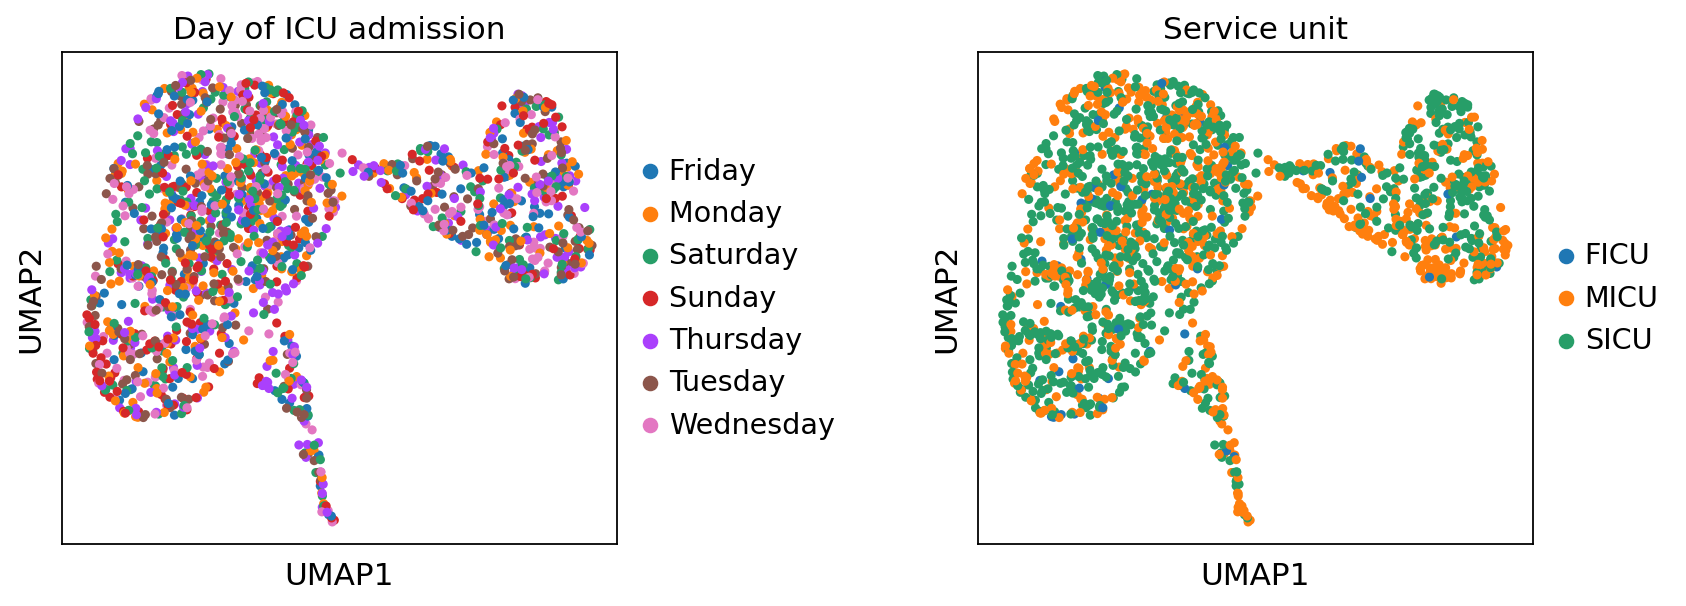

In [25]:
ep.pl.umap(
    adata,
    color=["day_icu_intime", "service_unit"],
    wspace=0.5,
    title=["Day of ICU admission", "Service unit"],
)

## Leiden clustering

In [26]:
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")

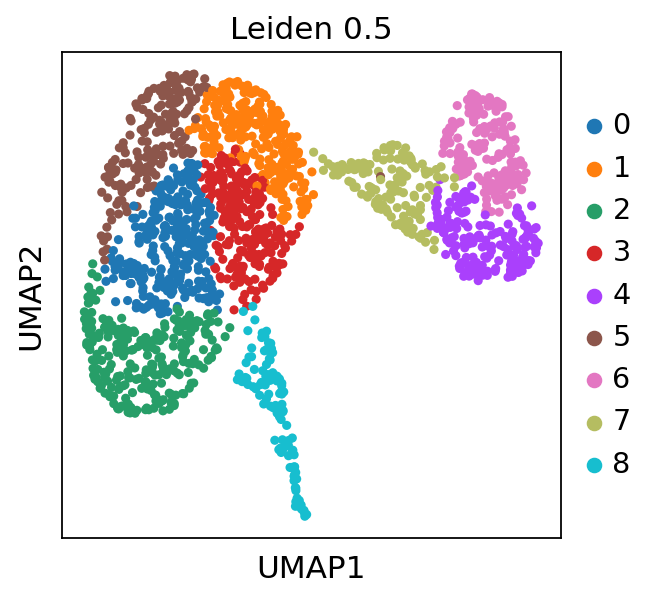

In [27]:
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

## Hospital & ICU statistics

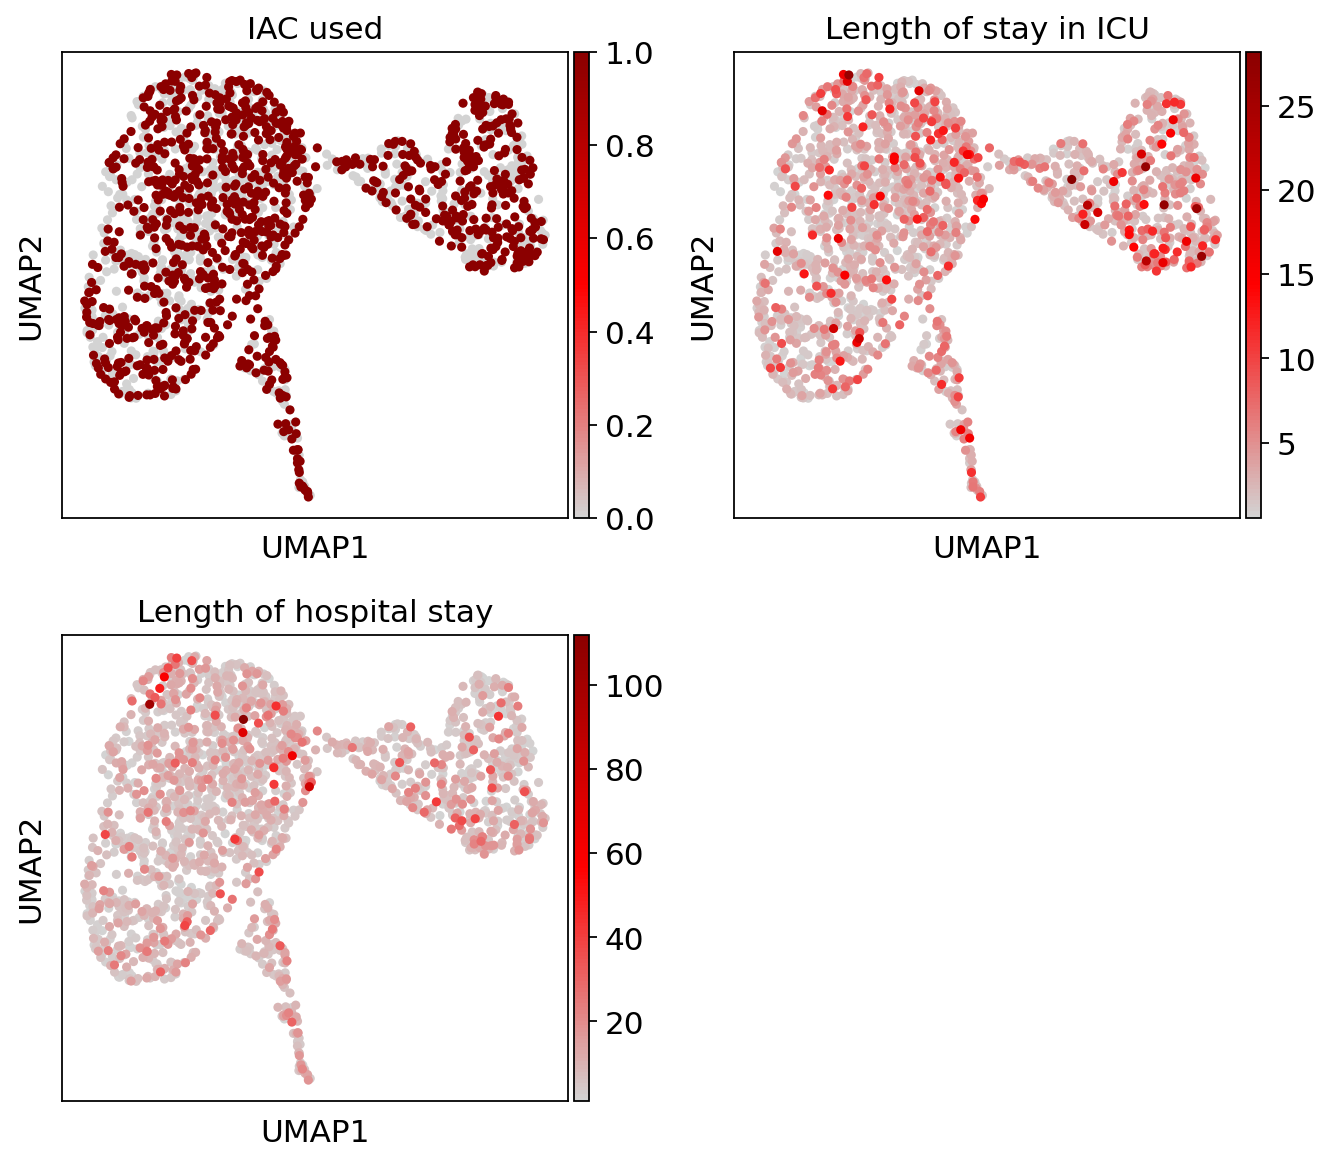

In [28]:
ep.pl.umap(
    adata,
    color=["aline_flg", "icu_los_day", "hospital_los_day"],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=["IAC used", "Length of stay in ICU", "Length of hospital stay"],
    ncols=2
)

## Death

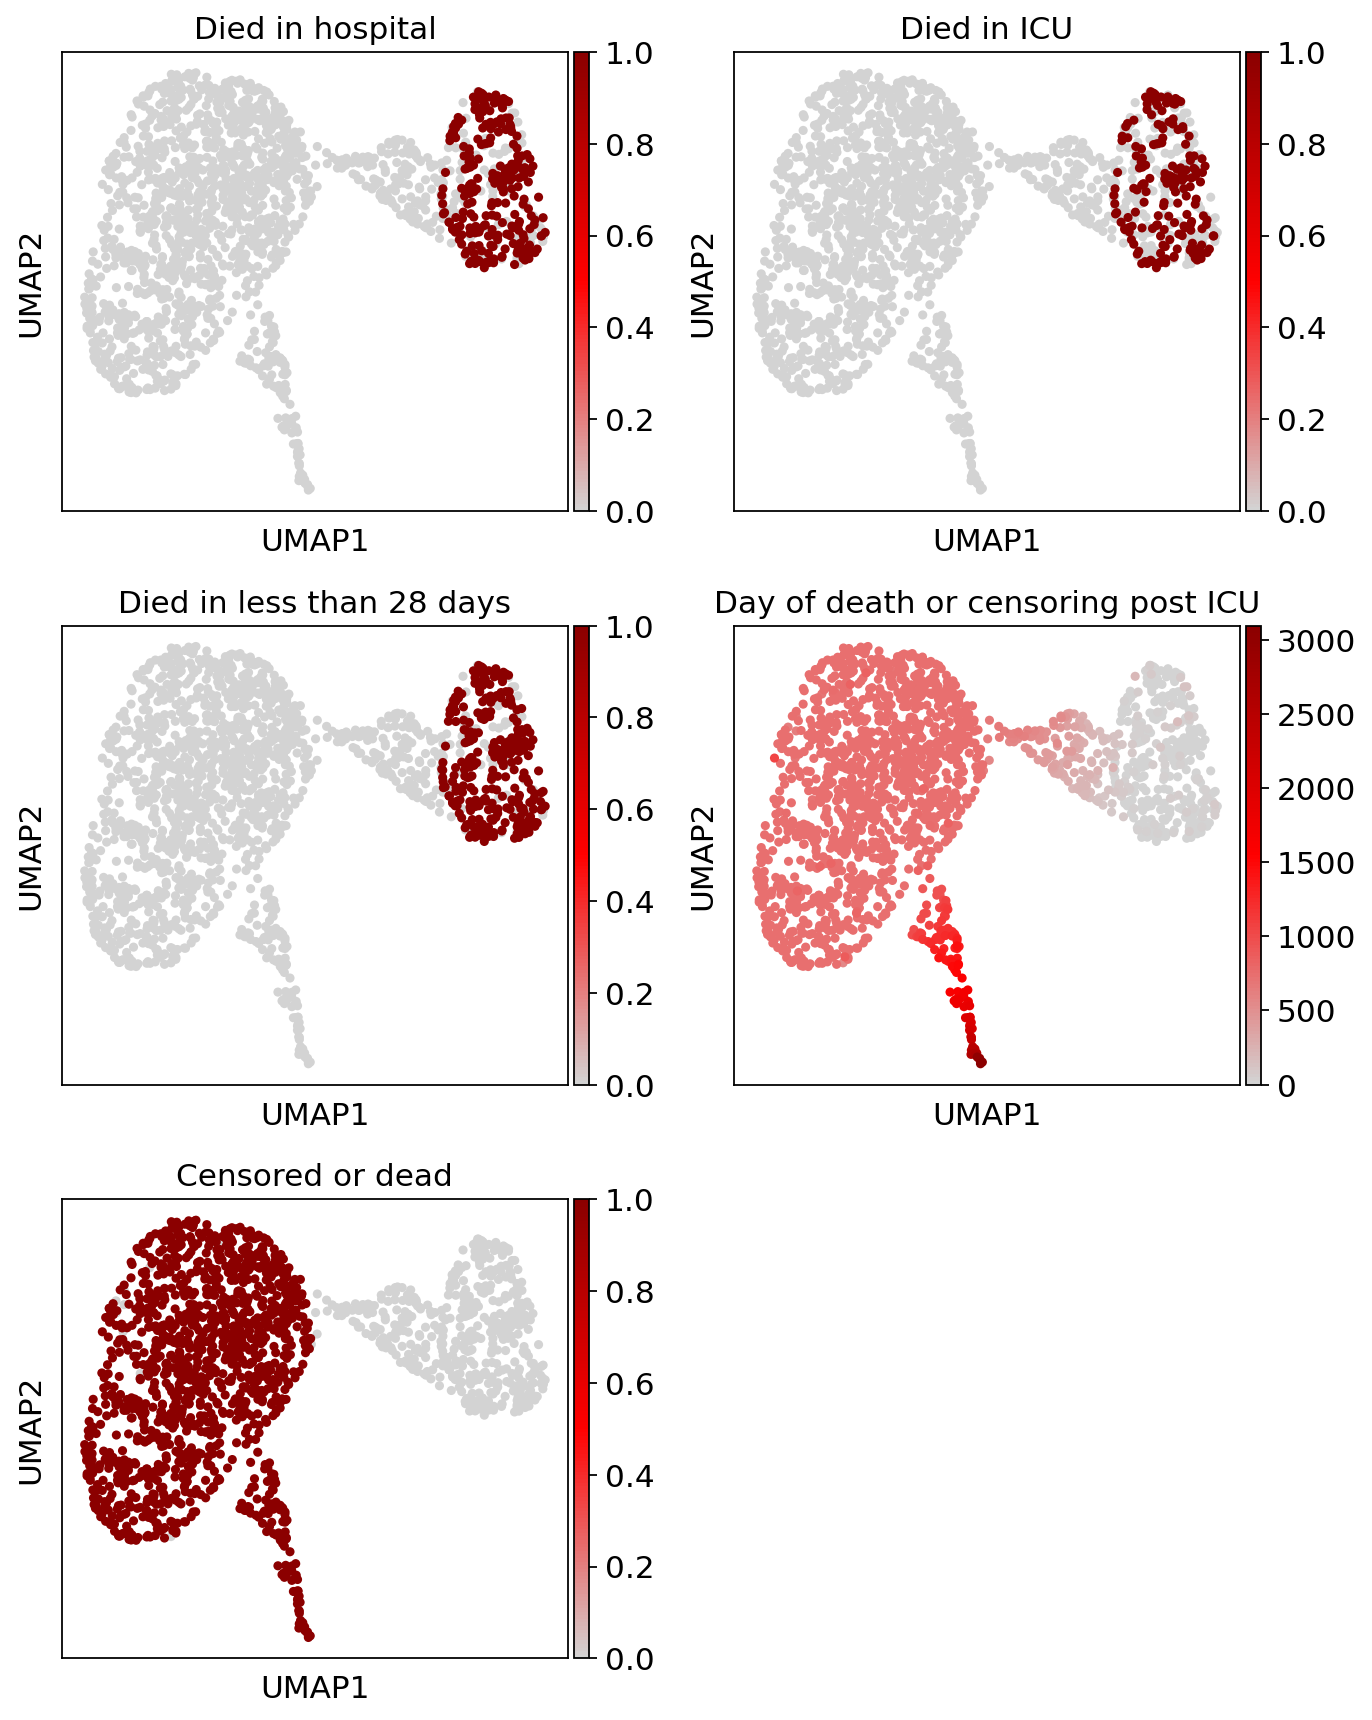

In [29]:
ep.pl.umap(
    adata,
    color=[
        "hosp_exp_flg",
        "icu_exp_flg",
        "day_28_flg",
        "mort_day_censored",
        "censor_flg",
    ],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=[
        "Died in hospital",
        "Died in ICU",
        "Died in less than 28 days",
        "Day of death or censoring post ICU",
        "Censored or dead",
    ],
    ncols=2
)

## Demographics

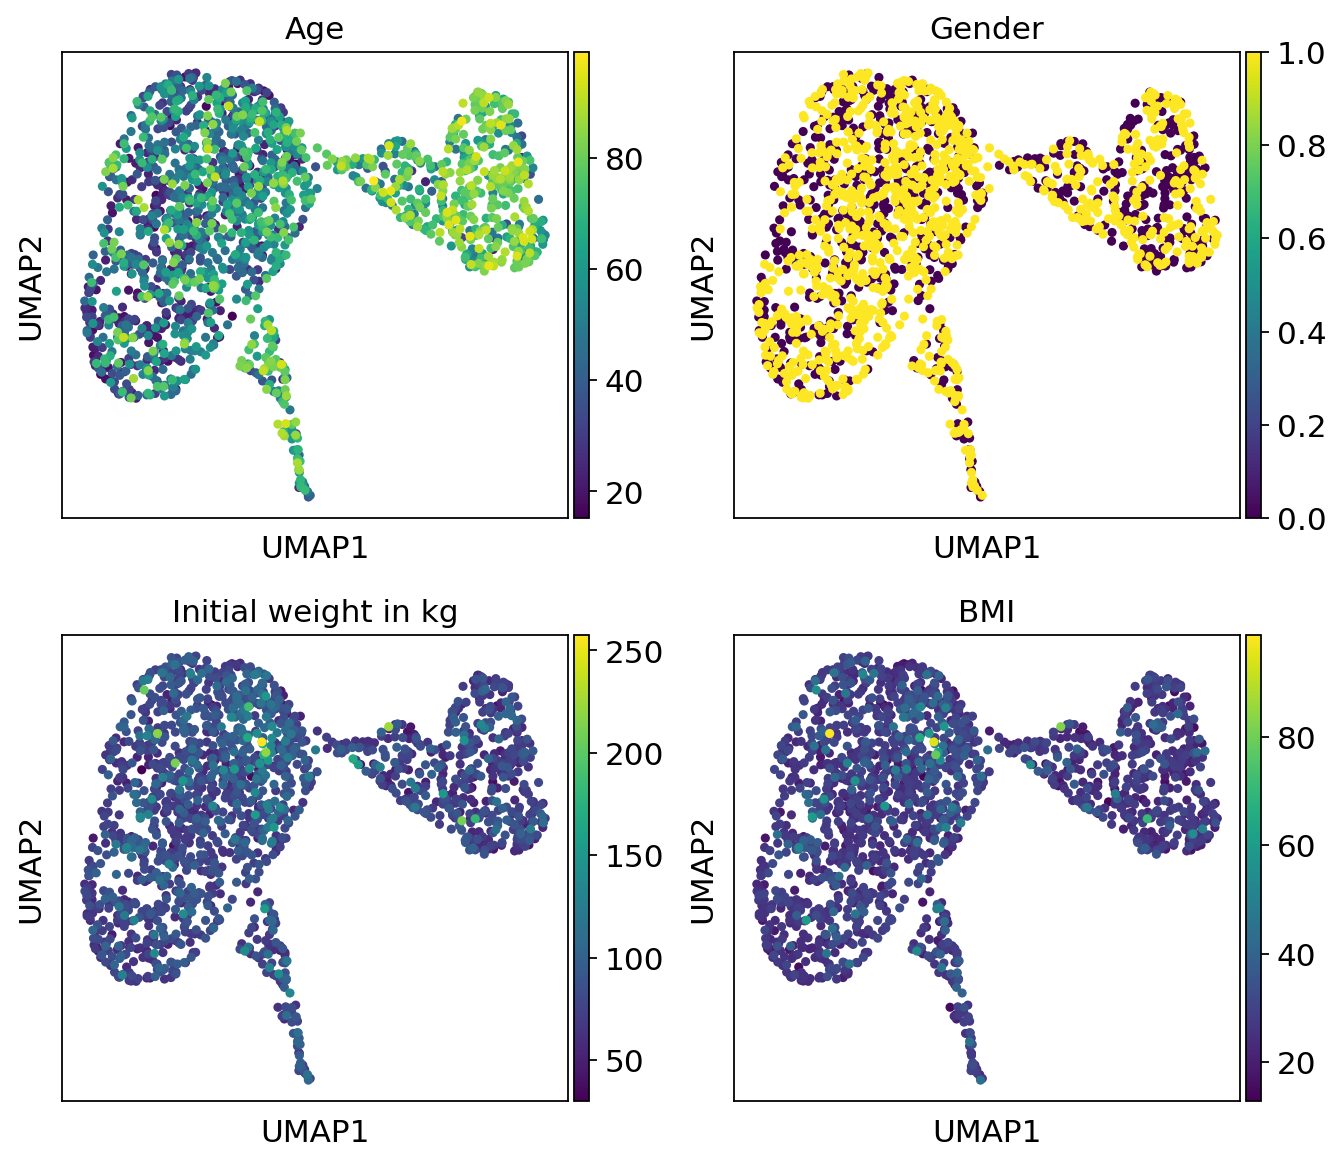

In [30]:
ep.pl.umap(
    adata,
    color=[
        "age",
        "gender_num",
        "weight_first",
        "bmi",
    ],
    title=["Age", "Gender", "Initial weight in kg", "BMI"],
    ncols=2
)

## Comorbidities

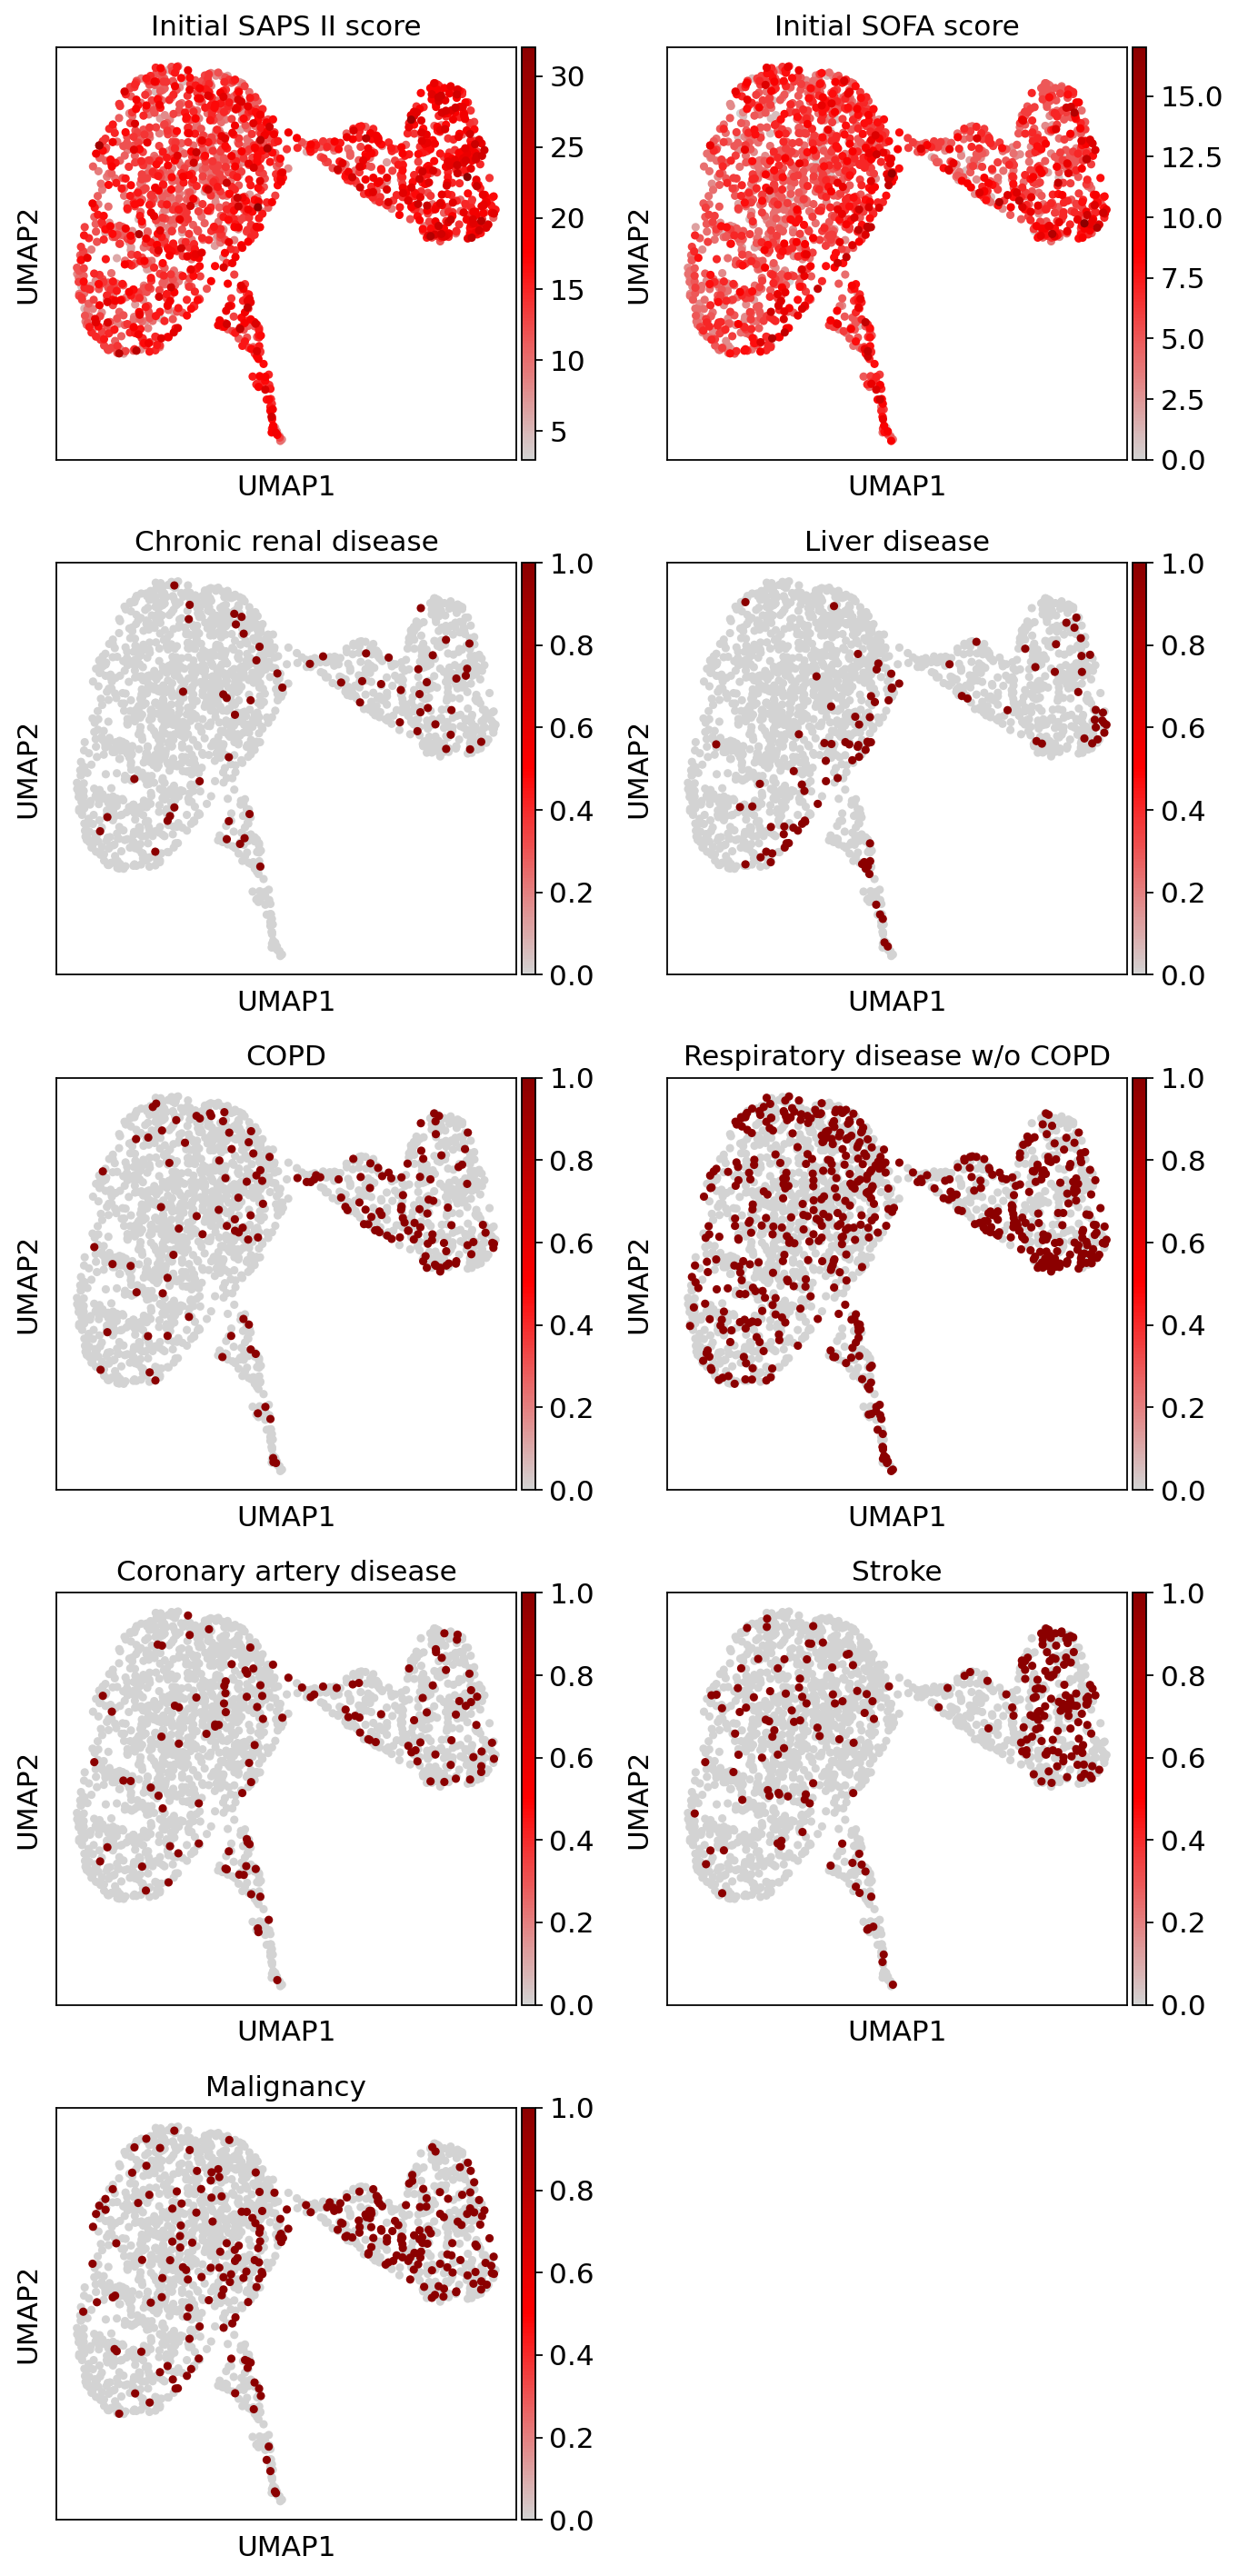

In [31]:
ep.pl.umap(
    adata,
    color=[
        "sapsi_first",
        "sofa_first",
        "renal_flg",
        "liver_flg",
        "copd_flg",
        "resp_flg",
        "cad_flg",
        "stroke_flg",
        "mal_flg",
    ],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=[
        "Initial SAPS II score",
        "Initial SOFA score",
        "Chronic renal disease",
        "Liver disease",
        "COPD",
        "Respiratory disease w/o COPD",
        "Coronary artery disease",
        "Stroke",
        "Malignancy",
    ],
    ncols=2
)

## Initial lab measurements

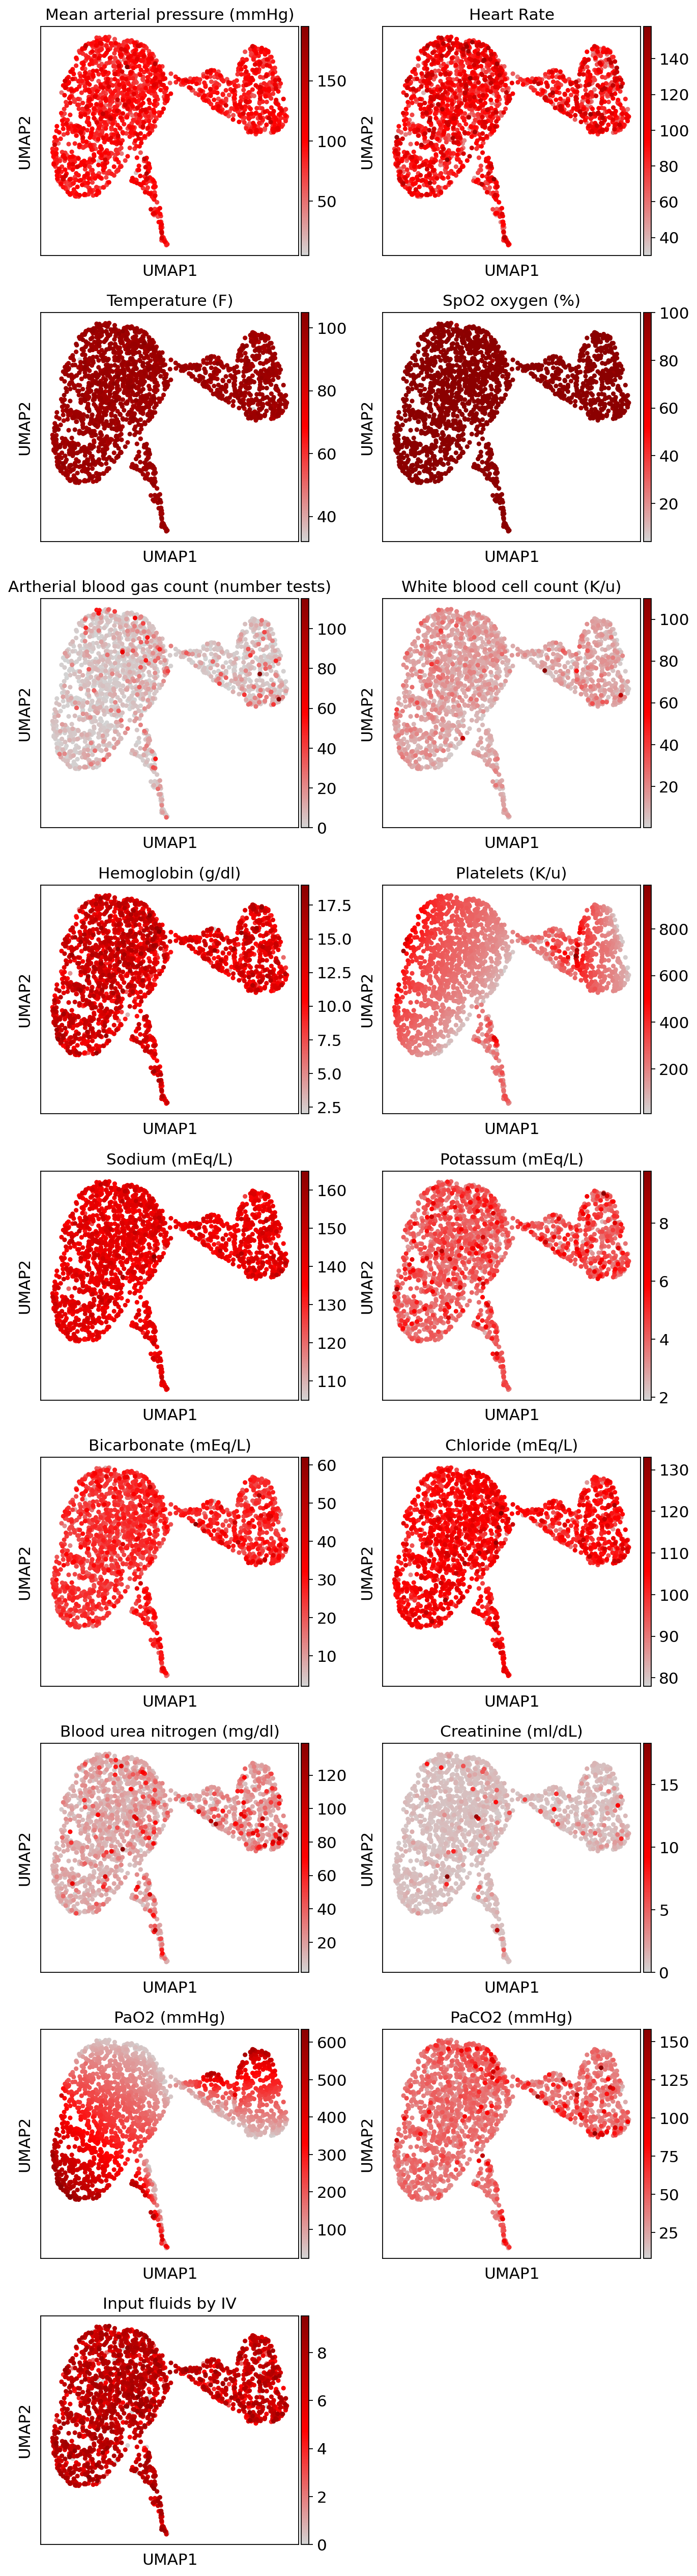

In [32]:
ep.pl.umap(
    adata,
    color=[
        "map_1st",
        "hr_1st",
        "temp_1st",
        "spo2_1st",
        "abg_count",
        "wbc_first",
        "hgb_first",
        "platelet_first",
        "sodium_first",
        "potassium_first",
        "tco2_first",
        "chloride_first",
        "bun_first",
        "creatinine_first",
        "po2_first",
        "pco2_first",
        "iv_day_1",
    ],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=[
        "Mean arterial pressure (mmHg)",
        "Heart Rate",
        "Temperature (F)",
        "SpO2 oxygen (%)",
        "Artherial blood gas count (number tests)",
        "White blood cell count (K/u)",
        "Hemoglobin (g/dl)",
        "Platelets (K/u)",
        "Sodium (mEq/L)",
        "Potassum (mEq/L)",
        "Bicarbonate (mEq/L)",
        "Chloride (mEq/L)",
        "Blood urea nitrogen (mg/dl)",
        "Creatinine (ml/dL)",
        "PaO2 (mmHg)",
        "PaCO2 (mmHg)",
        "Input fluids by IV",
    ],
    ncols=2
)

## Annotation

In [33]:
ep.tl.rank_features_groups(adata, groupby="leiden_0_5")

/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func

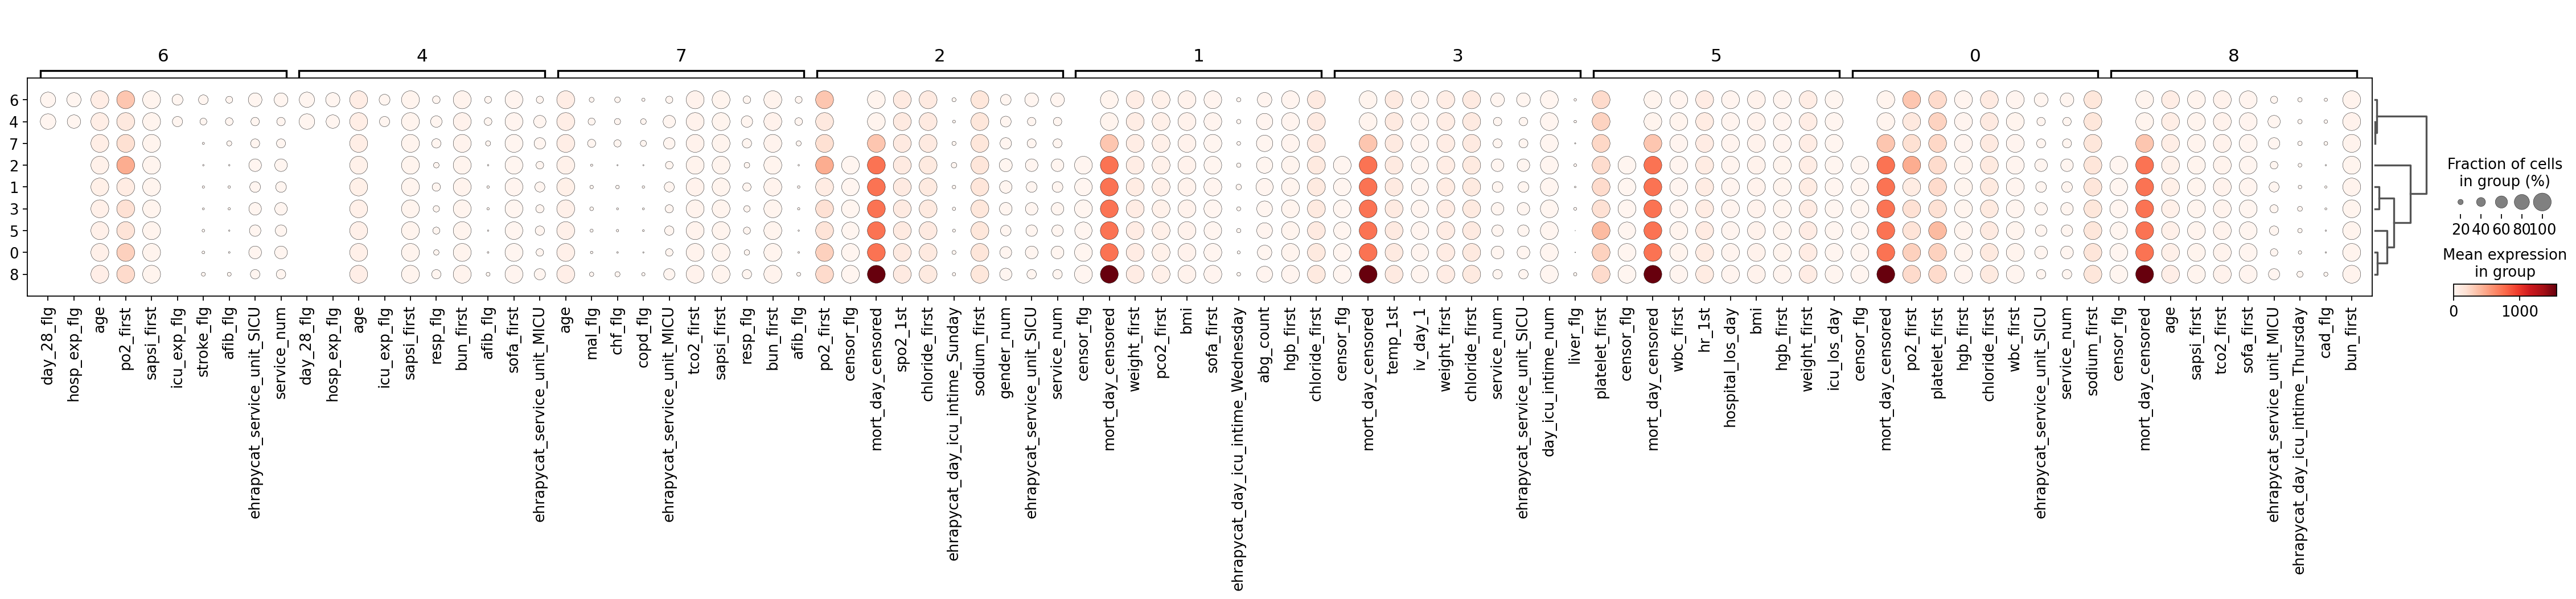

In [34]:
ep.pl.rank_features_groups_dotplot(
    adata, key="rank_features_groups", groupby="leiden_0_5"
)

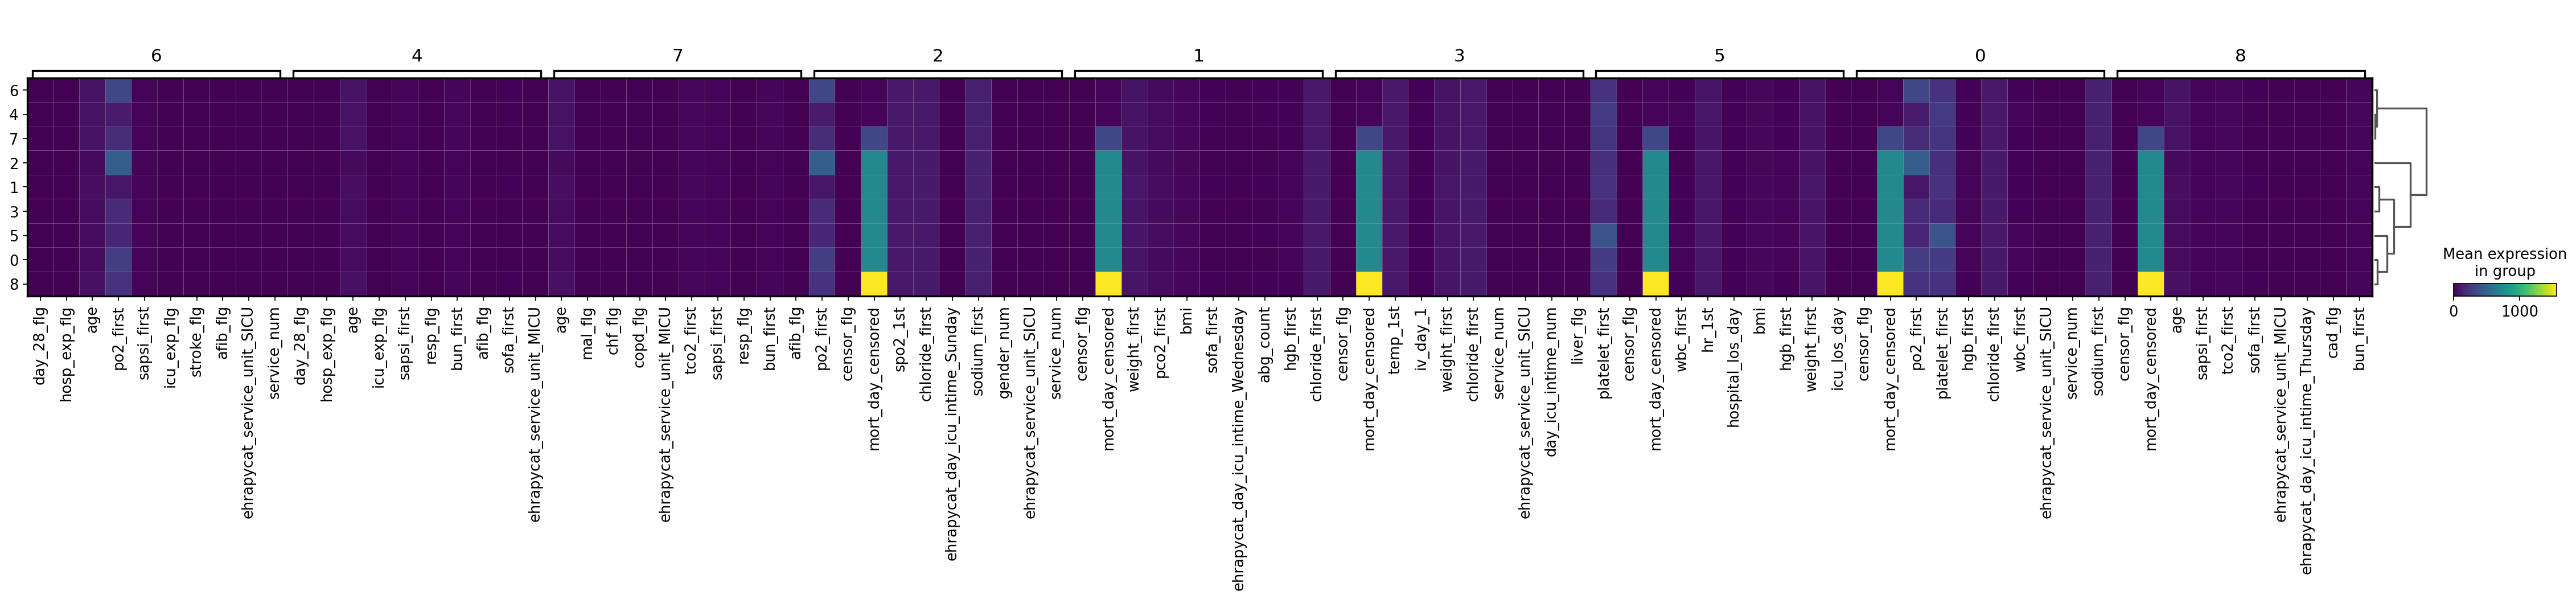

In [35]:
ep.pl.rank_features_groups_matrixplot(
    adata, key="rank_features_groups", groupby="leiden_0_5"
)

In [36]:
adata.obs["annotation"] = "NA"

In [37]:
annotation = {
    "0": "age+/death+/stroke+/pao2+",
    "1": "age+/death+/stroke+/tumor+",
    "2": "resp+",
    "3": "resp+",
    "4": "resp+",
    "5": "resp+/liver+/tumor+",
    "6": "resp+",
    "7": "input fluids+",
    "8": "resp+/pao2+",
    "9": "input fluids+",
    "10": "input fluids+",
    "11": "input fluids++/death+",
    "12": "Late death",
}

In [38]:
adata.obs["annotation"] = [
    annotation[l] if l in annotation.keys() else l for l in adata.obs["leiden_0_5"]
]

## Paga 

In [39]:
ep.tl.paga(adata, groups="leiden_0_5")

... storing 'annotation' as categorical


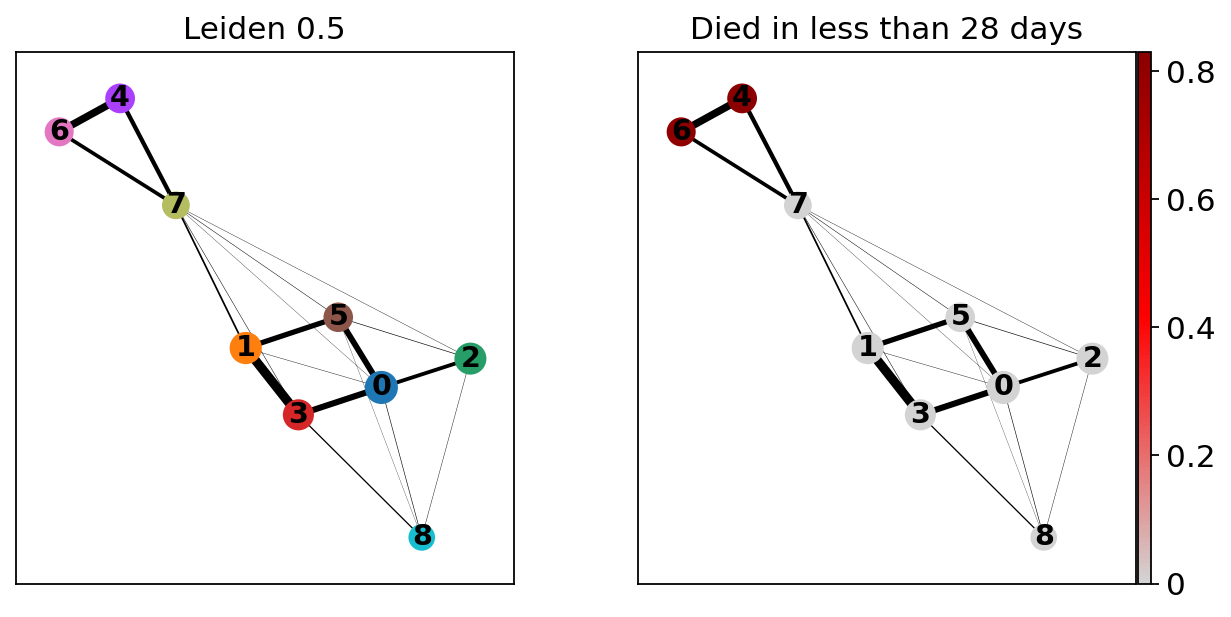

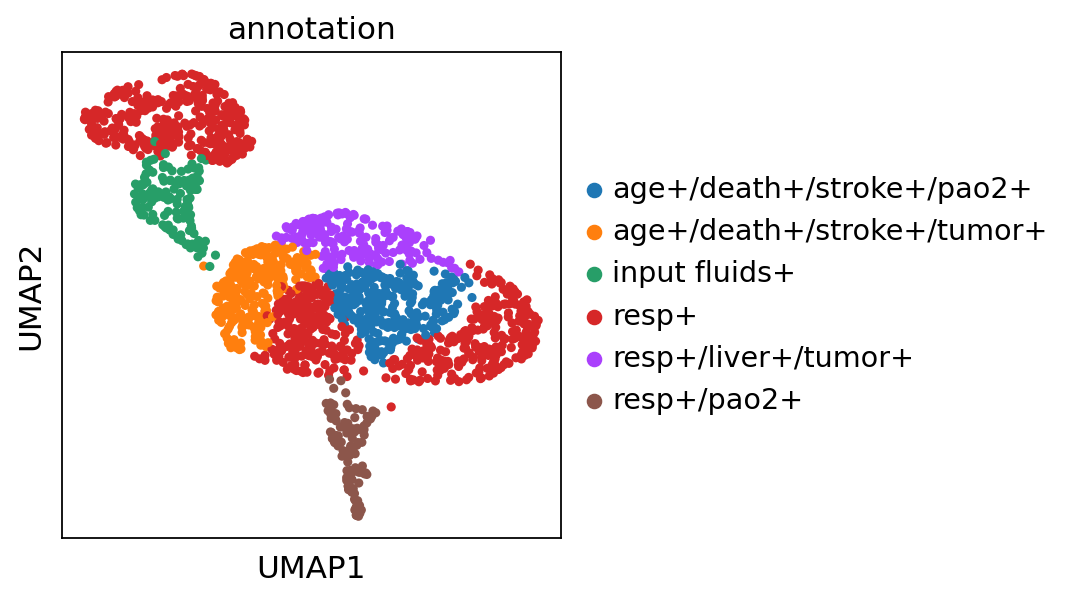

In [40]:
ep.pl.paga(
    adata,
    color=["leiden_0_5", "day_28_flg"],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=["Leiden 0.5", "Died in less than 28 days"],
)

ep.tl.umap(adata, init_pos="paga")
ep.pl.umap(adata, color=["annotation"])

In [41]:
ep.tl.draw_graph(adata, init_pos="paga")

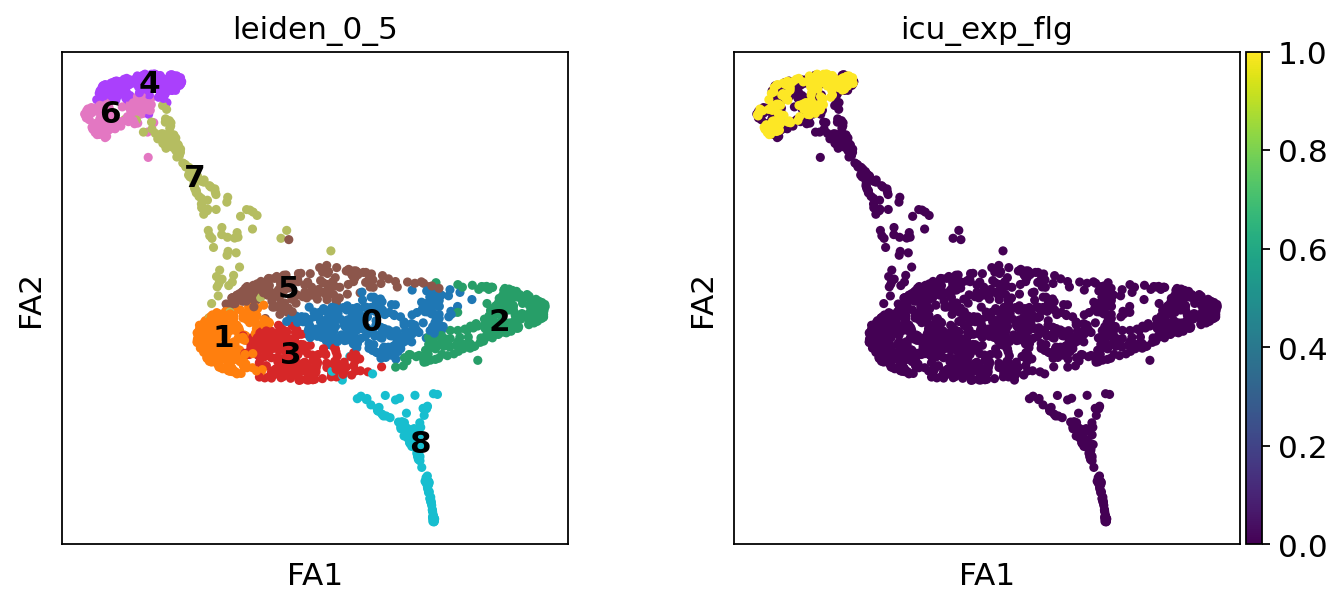

In [42]:
ep.pl.draw_graph(adata, color=["leiden_0_5", "icu_exp_flg"], legend_loc="on data")

## Writing the results into a file

We save all of our computations and our final state into an `.h5ad` file. It can then be read again like `ep.io.read("mimic_2.h5ad", adata)`

In [43]:
ep.io.write("mimic_2.h5ad", adata)